# __**TP Clasificación**__

 ## Contexto // **Metadata**
- Contenido_de_Nitrogeno: Proporción de contenido de nitrógeno en el
suelo.
- Contenido_de_Fosforo: Proporción de contenido de fósforo en el suelo.
- Contenido_de_Potasio: Proporción de contenido de potasio en el suelo.
- Temperatura_C: Temperatura en grados Celsius.
- Humedad_Relativa: Humedad relativa en porcentaje.
- Nivel_de_pH: Nivel de pH del suelo.
- Precipitacion_mm: Cantidad de precipitación en milímetros.
- Tipo_de_Cultivo: Tipo de cultivo recomendado en función de los
parámetros anteriores.


El uso de Machine Learning en la agricultura es vital para optimizar
rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es
particularmente relevante en Argentina, donde la agricultura es un pilar
económico. Saber qué tipo de cultivo es más adecuado para ciertas
condiciones del suelo y del clima puede tener un impacto significativo en
la productividad y la sostenibilidad

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
cultivos = pd.read_csv('tipo_cultivo.csv')
copia = cultivos.copy()
cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
cultivos.drop(columns='Unnamed: 0', inplace=True)

In [4]:
variables_de_suelo = ['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo','Contenido_de_Potasio','Nivel_de_pH']
variables_de_clima = ['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']

# **EDA  // Análisis exploratorio de los datos**

### Validación de los datos

In [5]:
print('Variables de suelo')
for col in cultivos[variables_de_suelo]:
    print('--------------------------')
    print(col,':',cultivos[col].nunique(),'valores:')
    print(cultivos[col].unique())

Variables de suelo
--------------------------
Contenido_de_Nitrogeno : 137 valores:
[ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]
--------------------------
Contenido_de_Fosforo : 117 valores:
[ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95

In [6]:
print('Variables de clima')
for col in cultivos[variables_de_clima]:
    print('--------------------------')
    print(col,':',cultivos[col].nunique(),'valores:')
    print(cultivos[col].unique())

Variables de clima
--------------------------
Temperatura_C : 2200 valores:
[20.87974371 21.77046169 23.00445915 ... 24.13179691 26.2724184
 23.60301571]
--------------------------
Humedad_Relativa : 2200 valores:
[82.00274423 80.31964408 82.3207629  ... 67.22512329 52.12739421
 60.39647474]
--------------------------
Precipitacion_mm : 2200 valores:
[202.9355362 226.6555374 263.9642476 ... 173.3228386 127.1752928
 140.9370415]


In [7]:
cultivos.describe()

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Contenido_de_Nitrogeno  2200 non-null   int64  
 1   Contenido_de_Fosforo    2200 non-null   int64  
 2   Contenido_de_Potasio    2200 non-null   int64  
 3   Temperatura_C           2200 non-null   float64
 4   Humedad_Relativa        2200 non-null   float64
 5   Nivel_de_pH             2200 non-null   float64
 6   Precipitacion_mm        2200 non-null   float64
 7   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## **Distribución de las variables númericas de suelo**

In [9]:
round(cultivos[variables_de_suelo].describe(),2)

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Nivel_de_pH
count,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,6.47
std,36.92,32.99,50.65,0.77
min,0.00,5.00,5.00,3.50
25%,21.00,28.00,20.00,5.97
50%,37.00,51.00,32.00,6.43
75%,84.25,68.00,49.00,6.92
max,140.00,145.00,205.00,9.94


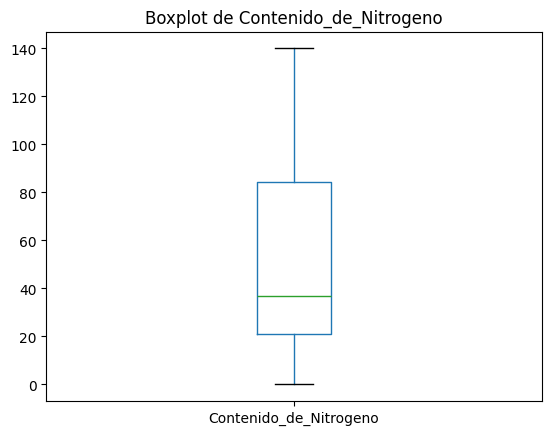

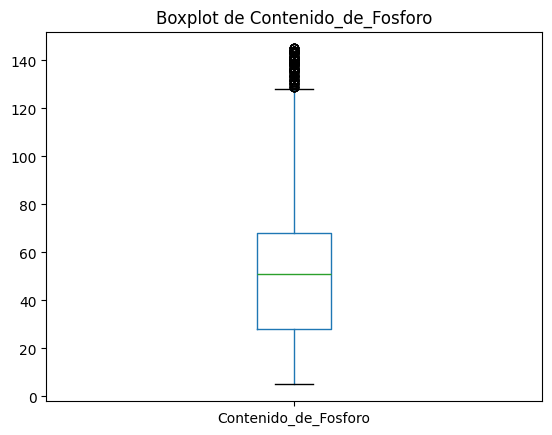

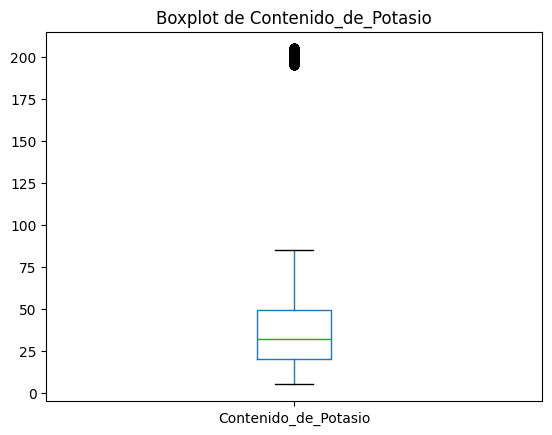

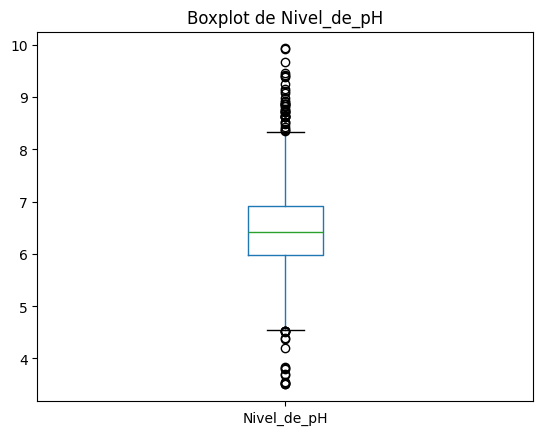

In [10]:
for columna in variables_de_suelo:
    cultivos.boxplot(column=columna)
    plt.title(f'Boxplot de {columna}')
    plt.grid(False)
    plt.show()

## **¿Hay presencia de outliers en las variables númericas de clima?**

### No se encuentran valores anómalos en variables de suelo.

No se encuentran outliers, esos valores no son anómalos. Si bien están por fuera del rango intercuartil, dichos valores son apropiados para las condiciones del suelo.

Por ejemplo, el rango de PH se encuentra entre 0 y 14. Aquí tenemos como mínimo 3.5 y como máximo 9.94, ambos pertenecen al rango.

## **Distribución de las variables númericas de clima**

In [11]:
round(cultivos[variables_de_clima].describe(),2)

,Temperatura_C,Humedad_Relativa,Precipitacion_mm
count,2200.00,2200.00,2200.00
mean,25.62,71.48,103.46
std,5.06,22.26,54.96
min,8.83,14.26,20.21
25%,22.77,60.26,64.55
50%,25.60,80.47,94.87
75%,28.56,89.95,124.27
max,43.68,99.98,298.56


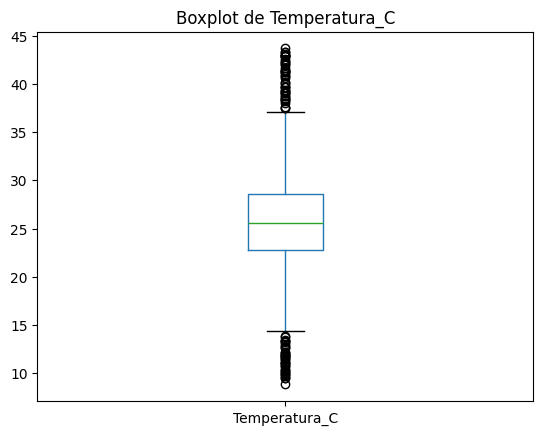

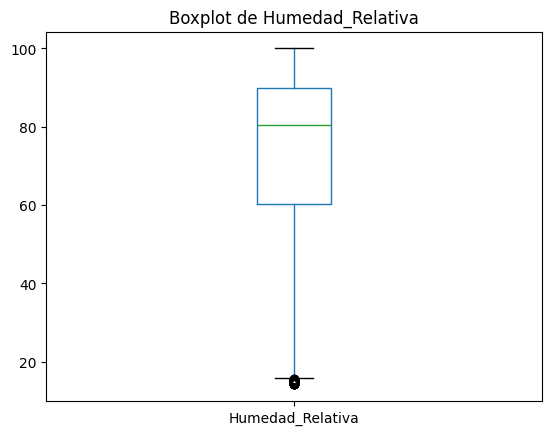

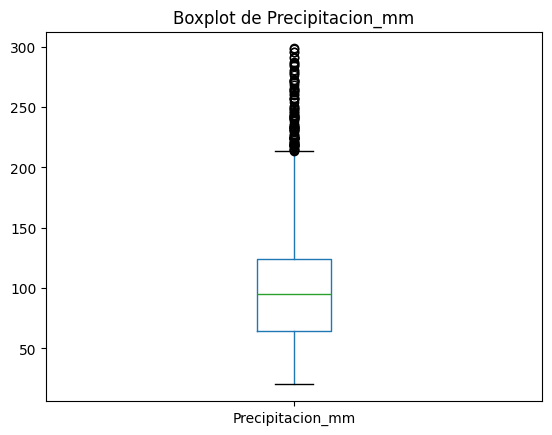

In [12]:
for columna in variables_de_clima:
    cultivos.boxplot(column=columna)
    plt.title(f'Boxplot de {columna}')
    plt.grid(False)
    plt.show()

## **¿Hay presencia de outliers en las variables númericas de suelo?**

 ### No se encuentran valores anómalos en variables de suelo.

 - Si bien no tenemos conocimiento sobre la ubicación exacta de los cultivos y asumimos que se encuentran en Argentina, son correctos los datos del conjunto. Se pueden considerar los valores cercanos a los 40 grados celsius en la región norte del país y no outliers. Con un mínimo de 8.83, no parece ser un dato anómalo en Argentina. 
 - En Humedad_Relativa tenemos valores que oscilan entre 14.26 % y 99.98%, no existen outsiders ya que el porcentaje de humedad relativa tiene que ser entre 0 y 100 %. 
 - En la columna de Precipitacion_mm tampoco se encuentran valores anómalos.

## **¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?**

### One Hot Encoding de Tipo_de_Cultivo

In [13]:
from sklearn.preprocessing import OneHotEncoder
cultivos_ohe_tipos_de_cultivos = OneHotEncoder(sparse=False)
cultivos_ohe_tipos_de_cultivos.fit(cultivos[['Tipo_de_Cultivo']])
cultivos_ohe_tipos_de_cultivos.categories_

c:\Users\juanf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [14]:
cultivos["apple"], cultivos["banana"], cultivos["blackgram"], cultivos["chickpea"], cultivos["coconut"], cultivos["coffee"], cultivos["cotton"], cultivos["grapes"], cultivos["jute"], cultivos["kidneybeans"], cultivos["lentil"], cultivos["maize"], cultivos["mango"], cultivos["mothbeans"], cultivos["mungbean"], cultivos["muskmelon"], cultivos["orange"], cultivos["papaya"], cultivos["pigeonpeas"], cultivos["pomegranate"], cultivos["rice"], cultivos["watermelon"] = cultivos_ohe_tipos_de_cultivos.transform(cultivos[['Tipo_de_Cultivo']]).T
cultivos.head()

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
cols_corr = []
for col in cultivos.columns:
    if col not in ['Humedad_Relativa', 'Precipitacion_mm', 'Temperatura_C','Tipo_de_Cultivo']:
        cols_corr.append(col)
cultivos_para_corr = cultivos[cols_corr]

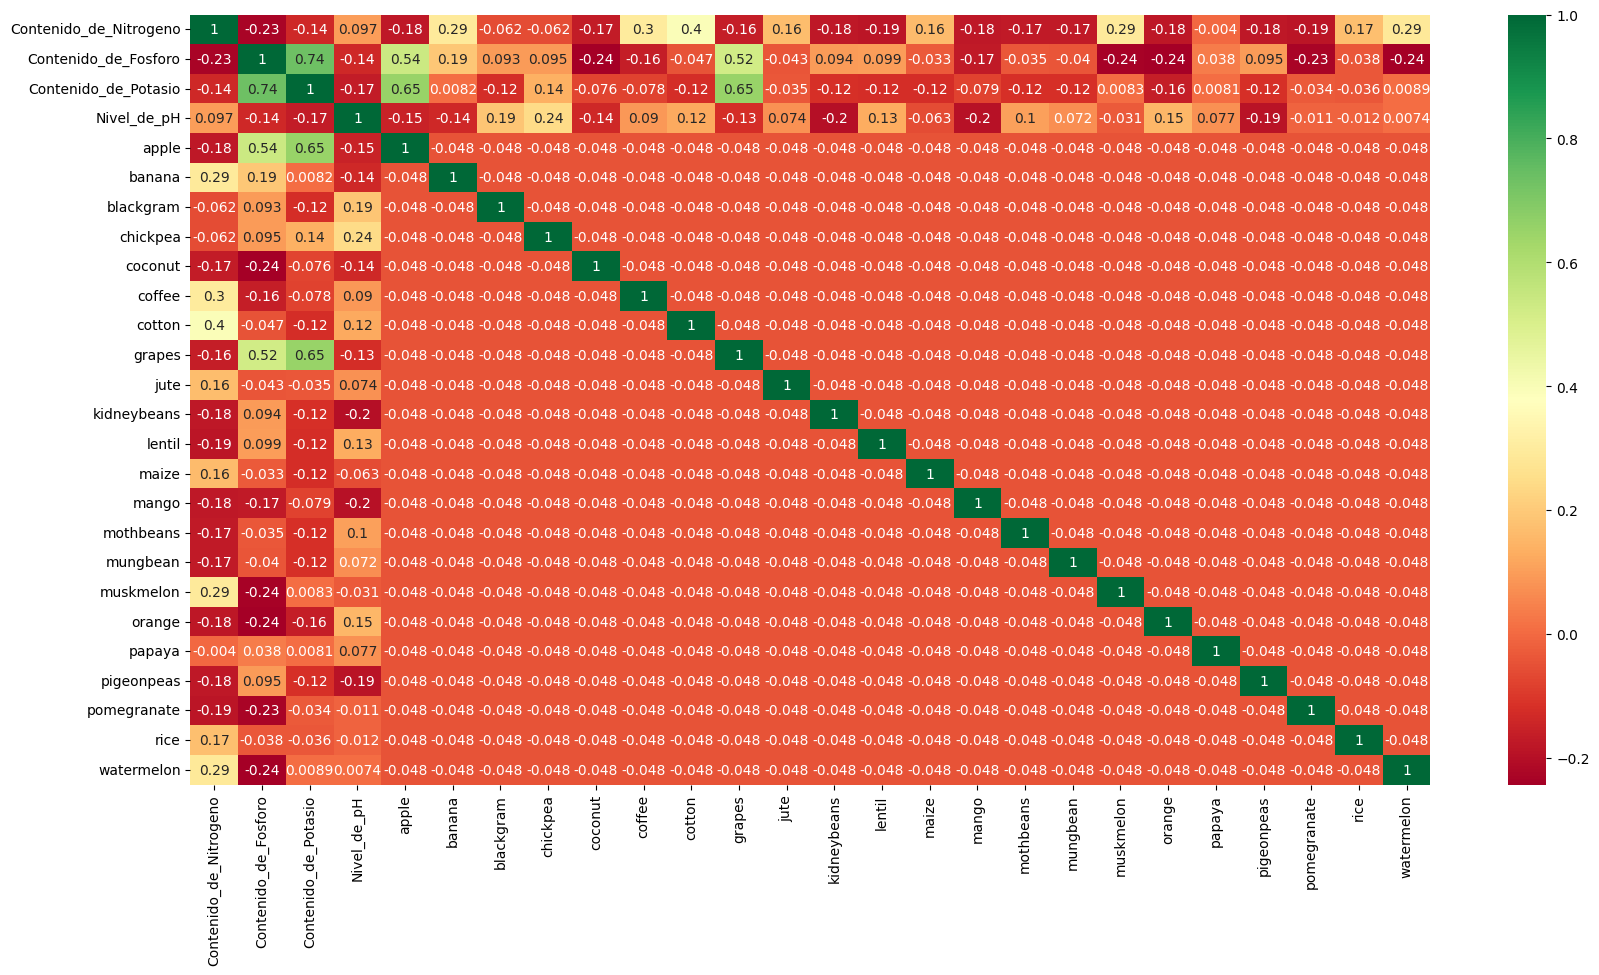

In [16]:
correlacion_cultivos = cultivos_para_corr.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlacion_cultivos, annot=True, cmap='RdYlGn')
plt.show()

### **_Únicamente en dos tipos de cultivo, la correlación es positiva y buena con las variables de suelo_**

- El contenido de fósforo está correlacionado con las manzanas y las uvas.
- El contenido de potasio está correlacionado con las manzanas y las uvas.
- A su vez, el contenido de fósforo se correlaciona con el contenido de potasio.

En resumen, cuando aumenta el contenido de fósforo y de potasio, los cultivos de manzanas y uvas tienden a incrementar su valor cuando estos dos aumentan ya que se correlacionan positivamente, y viceversa.

## **¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?**

In [17]:
columnas_numericas = cultivos.select_dtypes(include='number').columns
columnas_numericas

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'apple', 'banana', 'blackgram',
       'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute',
       'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean',
       'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice',
       'watermelon'],
      dtype='object')

In [18]:
cantidad_de_columnas_numericas = len(columnas_numericas)
cantidad_de_columnas_numericas

29

In [19]:
n_variables_de_suelo = len(variables_de_suelo)
n_variables_de_clima = len(variables_de_clima)

## Análisis de las variaciones de recomendación de cultivo según condiciones de suelo

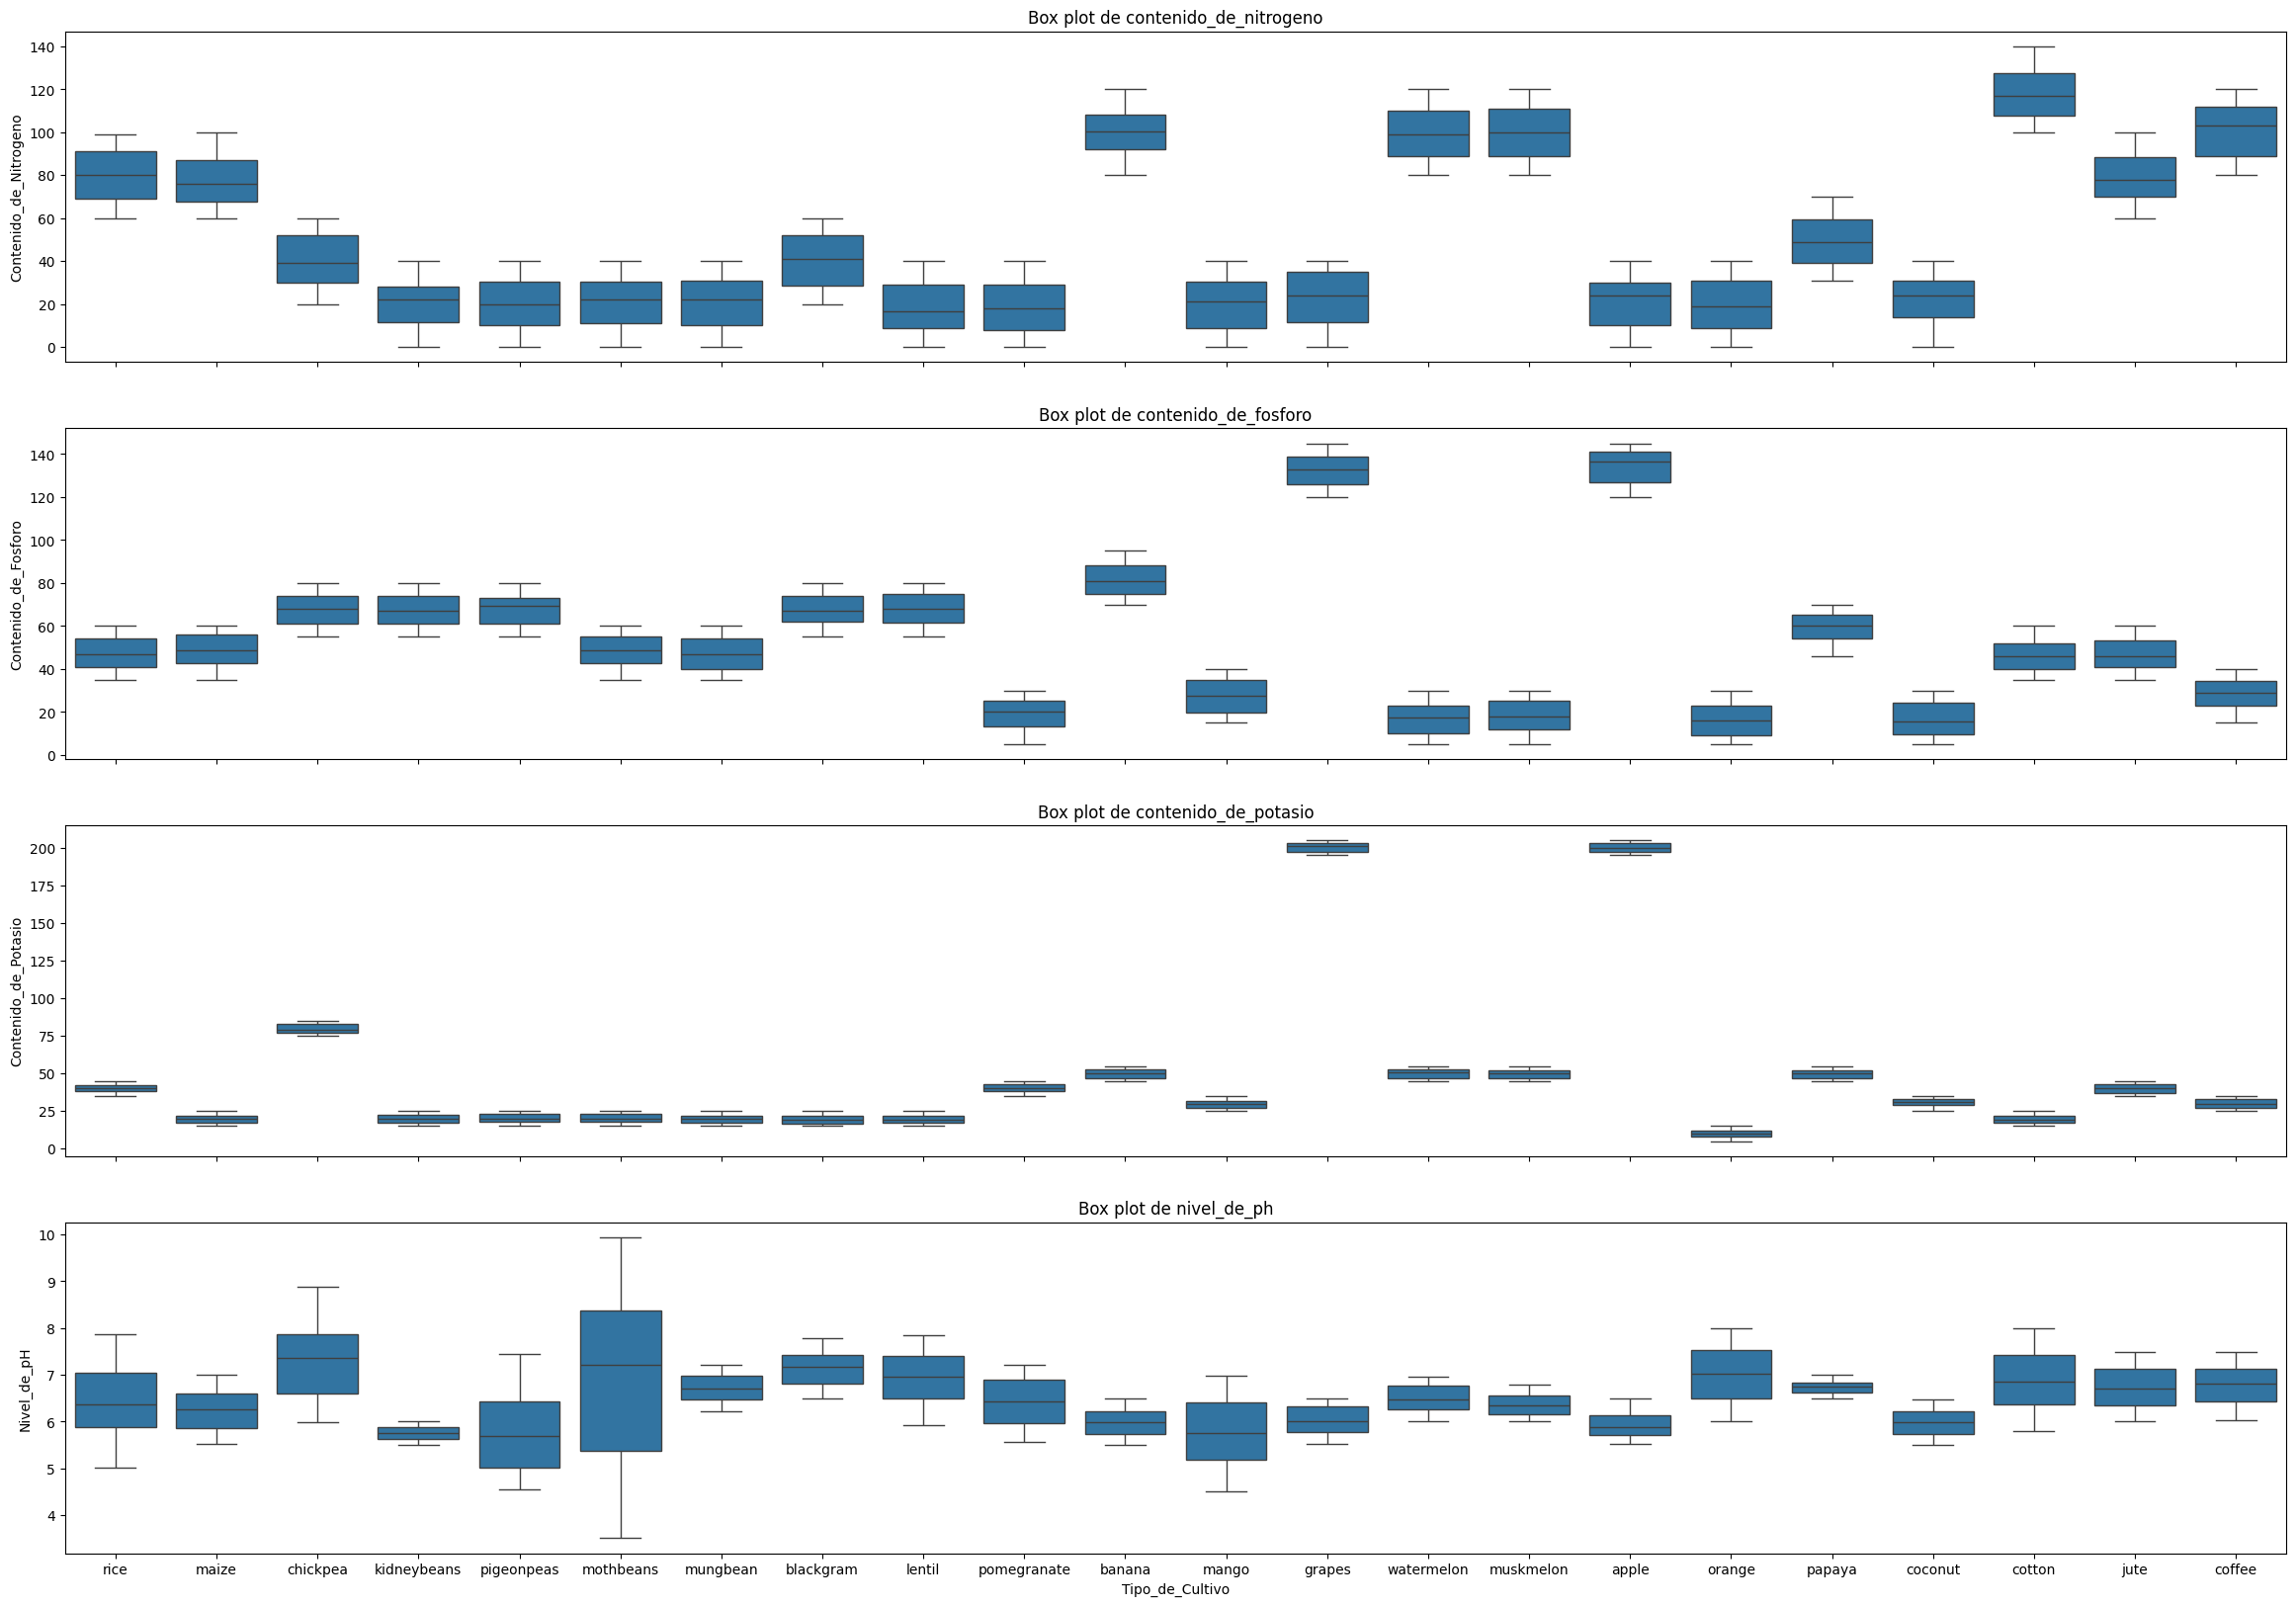

In [20]:
fig, axes = plt.subplots(n_variables_de_suelo, 1, figsize=(29,5 * n_variables_de_suelo), sharex=True)
for i, columna in enumerate(variables_de_suelo):
    sns.boxplot(x='Tipo_de_Cultivo', y=columna, data=cultivos, ax=axes[i])
    axes[i].set_title(f'Box plot de {columna.lower()}')
plt.show()

### La recomedación de cultivo, observando y tomando en cuenta las condiciones de suelo, la basaría en el siguiente orden descendente (de mejor a peor) utilizando dicha variable:

**1.** Contenido_de_Potasio: Claramente se ven dos tipos de cultivos y resulta ser la variable de suelo que mejor clasifica los tipos de cultivo. Las uvas y las manzanas pertenecen a un grupo totalmente distinto al de las demás al tener suelos con elevado contenido de potasio relativamente. La primera opción para un algoritmo de clasificación predomina.

**2.** Contenido_de_Fosforo: Resulta ser la segunda opción más confiable. Se siguen destacando relativamente las uvas y las manzanas. Umbral más cercano.

**3.** Contenido_de_Nitrogeno y Nivel_de_PH: nivel de ph directamente no permite realizar distinciones de tipos de cultivos. Contenido_de_Nitrogeno tiene un comportamiento similar a fósforo pero en este caso, es de un nivel de calidad menor para distinguir recomendaciones en distintos tipos de cultivos.

## Análisis de las variaciones de recomendación de cultivo según condiciones de clima

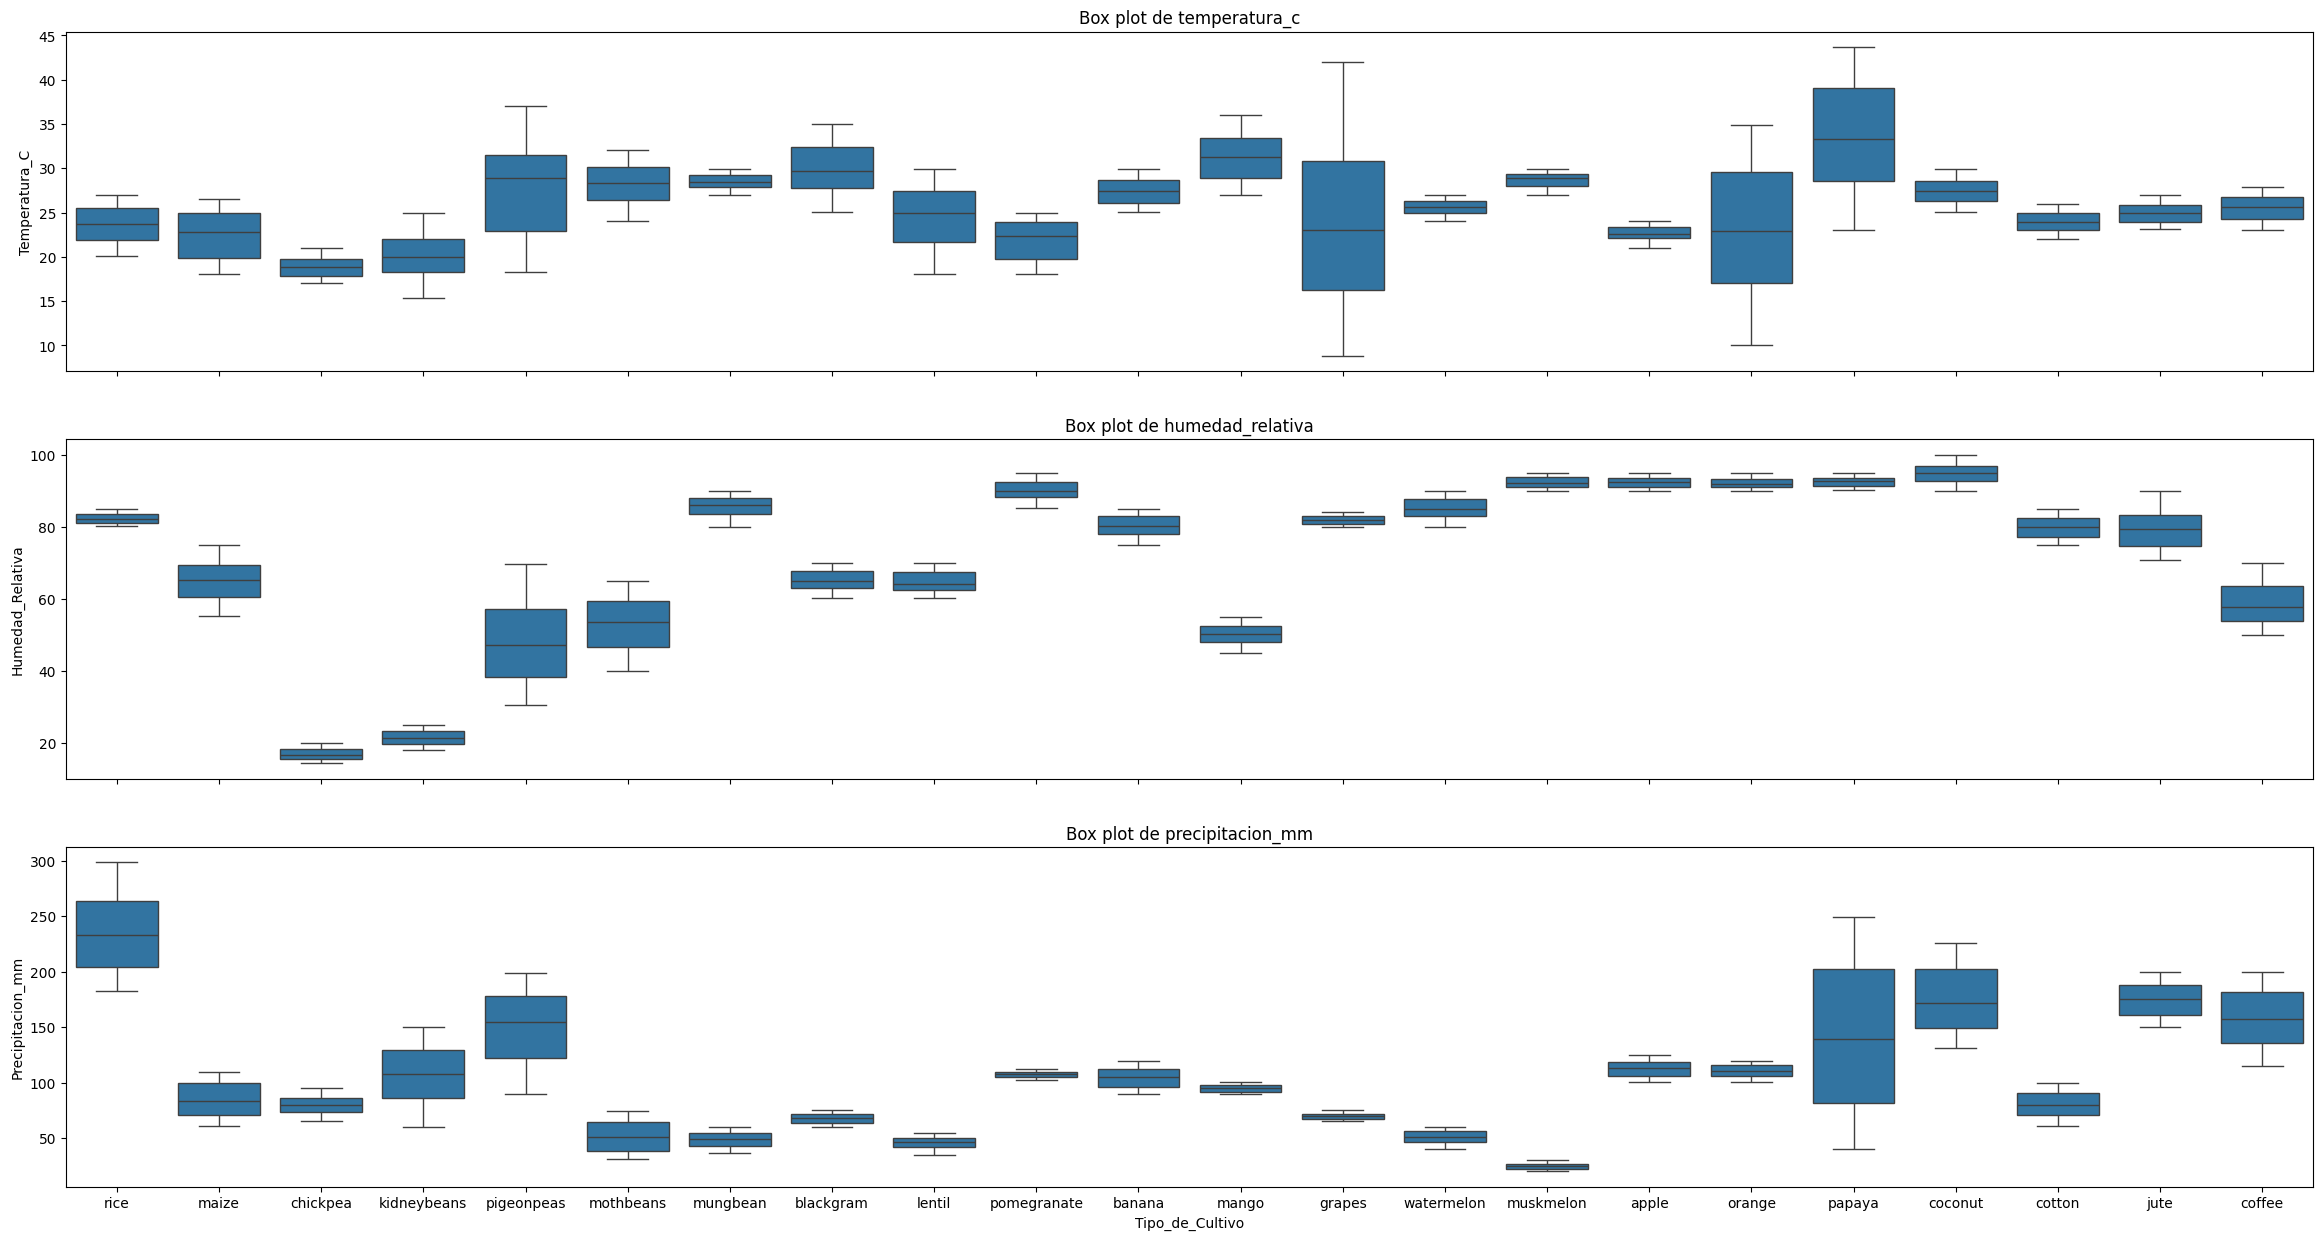

In [21]:
fig, axes = plt.subplots(n_variables_de_clima, 1, figsize=(29,5 * n_variables_de_clima), sharex=True)
for i, columna in enumerate(variables_de_clima):
    sns.boxplot(x='Tipo_de_Cultivo', y=columna, data=cultivos, ax=axes[i])
    axes[i].set_title(f'Box plot de {columna.lower()}')
plt.show()

### La recomedación de cultivo, observando y tomando en cuenta las condiciones de clima, la basaría en el siguiente orden descendente (de mejor a peor) utilizando dicha variable:
 - La humedad relativa parece ser la indicada dentro de las variables de clima para ser la mejor opción de tomarla como predictora de tipo de cultivo. A partir de 55% aproximadamente se dividen los tipos de cultivos en 2 por lo que se ve.
 - La precipitacion en milimetros únicamente permmite distinguir el arroz con los demás y la temperatura en grados celsius no es buen indicador del tipo de cultivo.

# **Machine Learning  // Regresión Logística y Árbol de decisión**

En esta sección, implementaremos dos modelos de Machine Learning
para predecir el Tipo_de_Cultivo basándonos en las variables del suelo
y del clima. Utilizaremos una Regresión Logística y un Árbol de
Decisión.

In [22]:
cultivos.head()

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


1er paso: Label Encoding para convertir los datos no númericos a una forma númerica equivalente (Tipo_de_Cultivo (no num) a una columna con datos num)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cultivos['tipo_de_cultivo'] = le.fit_transform(cultivos['Tipo_de_Cultivo'])
cultivos[['tipo_de_cultivo', 'Tipo_de_Cultivo']]

,tipo_de_cultivo,Tipo_de_Cultivo
0,20,rice
1,20,rice
2,20,rice
3,20,rice
4,20,rice
...,...,...
2195,5,coffee
2196,5,coffee
2197,5,coffee
2198,5,coffee


In [24]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

 ## **Regresión Logística**

## Train Test Split
Dividamos los datos en un conjunto de training y en un conjunto de testing.

In [25]:
from sklearn.model_selection import train_test_split
X = cultivos.drop(columns=['tipo_de_cultivo','apple', 'banana', 'blackgram',
       'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute',
       'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean',
       'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice',
       'watermelon','Tipo_de_Cultivo'],axis=1)
y = cultivos['Tipo_de_Cultivo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
X_test

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
1949,111,50,15,25.168201,80.303518,7.884550,84.624190
1554,2,131,199,22.474205,91.227597,6.017370,124.217970
1248,8,127,196,27.027661,83.170939,5.833302,70.956660
1109,30,28,30,31.866414,52.193316,5.064613,98.467686
1516,36,140,198,23.343864,91.476847,6.281884,104.426799
...,...,...,...,...,...,...,...
359,27,56,20,19.259754,20.513470,5.542690,94.953353
1168,33,31,34,31.329956,50.222876,5.421265,89.782162
1832,38,14,30,26.924495,91.201060,5.570745,194.902214
1712,44,64,54,29.807443,91.380485,6.742749,232.704613


In [27]:
X_train

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
831,3,63,16,24.380419,61.184582,6.868882,53.139467
373,22,80,20,23.008847,18.868810,5.669561,100.118612
810,6,77,20,25.787463,60.281630,6.058306,49.143372
1627,11,14,5,11.503229,94.893318,6.946355,115.568378
2140,117,34,25,24.838462,56.768532,7.212700,124.413504
...,...,...,...,...,...,...,...
265,29,75,75,19.624163,18.714832,7.064790,88.458569
162,67,51,24,23.502979,61.320261,5.584171,64.777914
1745,42,60,47,33.468737,92.127462,6.834808,136.827704
1503,8,120,201,21.186674,91.134357,6.321152,122.233323


In [28]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method='bfgs')
stats1=result.summary()
print(stats1)

c:\Users\juanf\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\juanf\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.646308
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43
                          MNLogit Regression Results                          
Dep. Variable:        Tipo_de_Cultivo   No. Observations:                 1760
Model:                        MNLogit   Df Residuals:                     1592
Method:                           MLE   Df Model:                          147
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.7909
Time:                        23:46:18   Log-Likelihood:                -1137.5
converged:                      False   LL-Null:                       -5439.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
     Tipo_de_Cultivo=banana       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0185    

## **Árbol de decisión**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,max_depth=5)
# Ajustamos el modelo
decision_tree_model.fit(X_train,y_train)
# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)

Puntuación de validación cruzada: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Precisión en entrenamiento = 0.9346590909090909
Precisión en pruebas = 0.9181818181818182


## Matriz de confusión

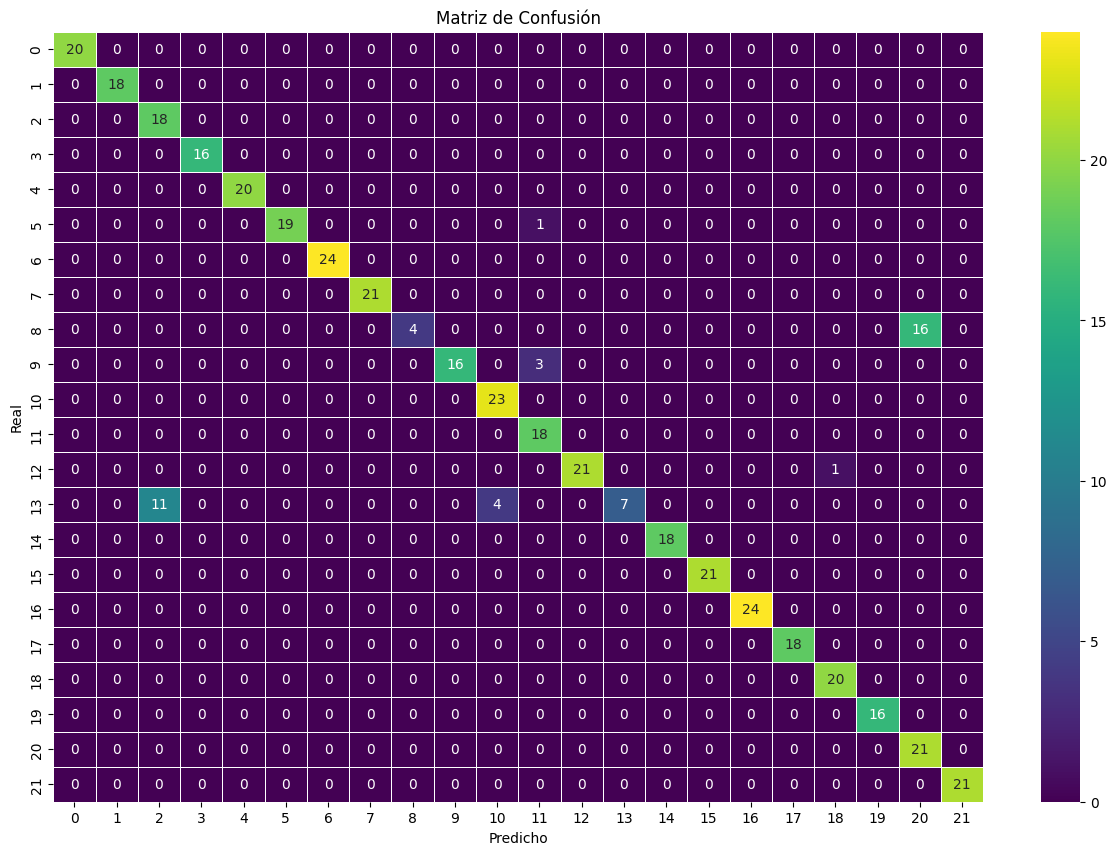

In [30]:
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [31]:
for indice, tipo_de_cultivo in enumerate(le.classes_):
    print(indice, tipo_de_cultivo)

0 apple
1 banana
2 blackgram
3 chickpea
4 coconut
5 coffee
6 cotton
7 grapes
8 jute
9 kidneybeans
10 lentil
11 maize
12 mango
13 mothbeans
14 mungbean
15 muskmelon
16 orange
17 papaya
18 pigeonpeas
19 pomegranate
20 rice
21 watermelon


**Interprete que significa la diagonal y los desvios de la diagonal. Cual
cultivo se confunde mas el algoritmo?**

 - Diagonal principal: Cada elemento en la diagonal principal representa la cantidad de veces que fueron correctamente clasificados cada tipo de cultivo. Cuanto más grande sea el número en la diagonal, mejor, indica que el modelo predijo correctamente ese tipo de cultivo. En este caso, los 5 tipos de cultivo que mejor se clasificaron son: chickpea, grapes, lentil, mango y pomegranate.

 - Desvíos de la diagonal: Cada elemento fuera de la diagonal es un error de clasificación. Por ejemplo, [8, 20] ó [jute, rice] indicaría cuántas veces del arroz fueron incorrectamente clasificadas como jute. Cuanto menor sea este número, mejor.

 __El cultivo que se confunde más el algortimo es el que se mencionó recién, la incorrecta cantidad de veces que se clasifcó al arroz como jute, que son 15.__

## **Hacemos el árbol de decisión**

In [32]:
features = list(X.columns)

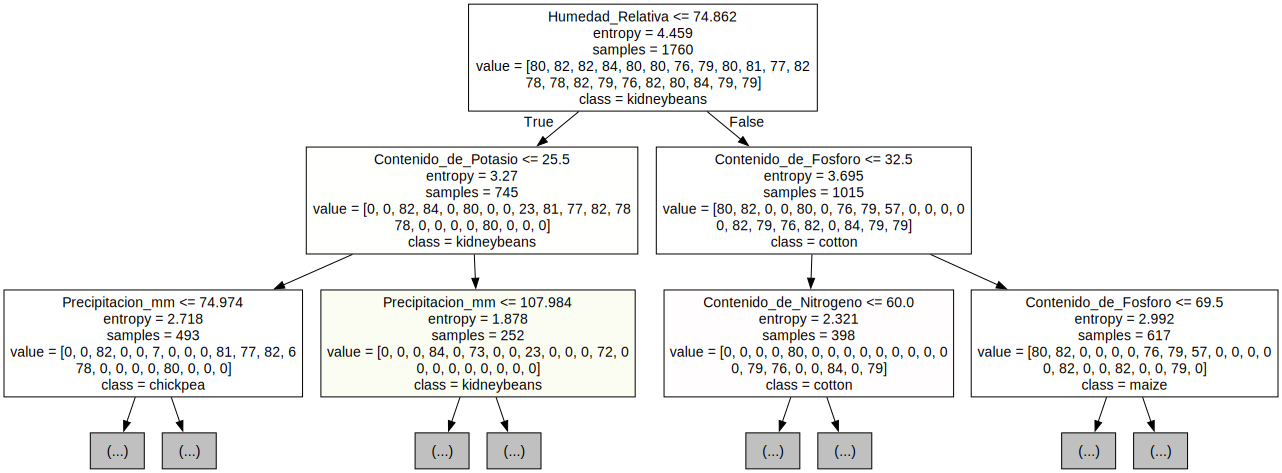

In [33]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(decision_tree_model ,feature_names = features, class_names = y.unique(), max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))